A case study using iris dataset for KNN algorithm 

In [2]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res 

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters. 
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the `KNeighborsClassifier` function. 

In [ ]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy. 

Predictions from the classifier:
[0 2 1 0 0 1 1 2 2 0 2 2 2 1 1 0 0 2 1 1 0 0 0 1 1 2 0 0 1 0 1 1 1 0 1 2 0
 1 0 1 2 2 2 0 2 0 2 2 0 0 0 1 2 2 2 2 1 1 0 1 2 1 2 2 2 0 0 0 0 0 0 0 1 1
 2 1 2 1 2 2 1 1 1 0 2 1 2 1 0 1 2 1 0 2 0 1 2 2 0 2 1 0 0 2 1 1 2 2 0 1 1
 1 2 2 2 1 1 2 1 2]
Target values:
[0 2 1 0 0 1 1 2 2 0 2 2 2 1 1 0 0 2 1 1 0 0 0 1 1 2 0 0 1 0 1 1 1 0 1 2 0
 1 0 1 2 2 2 0 2 0 2 2 0 0 0 1 2 2 2 2 1 1 0 1 2 1 2 2 2 0 0 0 0 0 0 0 1 1
 2 1 2 1 2 2 1 1 1 0 2 1 2 1 0 1 2 1 0 2 0 1 2 2 0 2 1 0 0 2 1 1 2 2 0 1 1
 1 2 2 2 1 1 2 1 2]
1.0


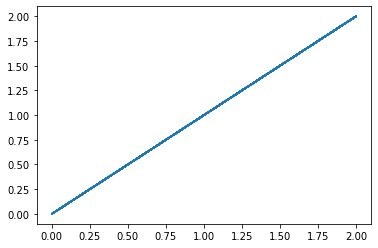

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)
# do a 80-20 split of the data
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# perform a KNN analysis of the simulated data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))
# output accuracy score
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)
# plot your different results
plt.plot(learn_data_predicted,train_labels)
